In [14]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

# Encoding

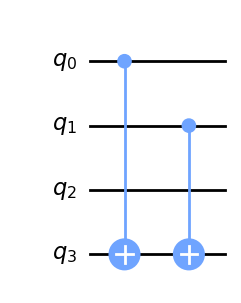

In [16]:
from qiskit import QuantumCircuit, Aer, execute


qc = QuantumCircuit(4)
qc.cx(0, 3)
qc.cx(1, 3)
qc.draw()



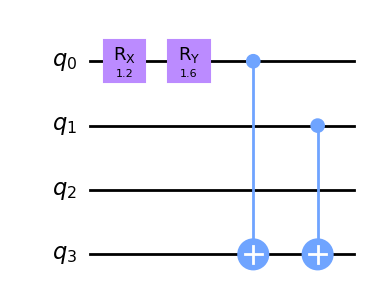

In [20]:
from qiskit import QuantumCircuit, Aer, execute

alpha = 0.6  
beta = 0.8    
qc = QuantumCircuit(4)

qc.rx(2 * alpha, 0)
qc.ry(2 * beta, 0)   

qc.cx(0, 3)
qc.cx(1, 3)
qc.draw()



In [21]:

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector(qc)
print(statevector)

Statevector([0.57501686+0.40504972j, 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.59205953-0.3933902j ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ],
            dims=(2, 2, 2, 2))


In [31]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute


alpha = np.random.rand() + 1j * np.random.rand()
beta = np.sqrt(1 - np.abs(alpha)**2) * np.exp(1j * np.random.rand() * 2 * np.pi)
angle_x = np.random.rand() * 2 * np.pi
angle_y = np.random.rand() * 2 * np.pi
angle_z = np.random.rand() * 2 * np.pi

qc = QuantumCircuit(3,3)
qc.cx(0, 1)
qc.cx(0, 2)
qc.rx(2 * np.angle(alpha), 0)  
qc.ry(2 * np.angle(beta), 0)  

qc.rx(angle_x, 1)
qc.ry(angle_y, 1)
qc.rz(angle_z, 1)

qc.measure([0, 1], [0, 1])  
qc.draw()

Traceback (most recent call last):
  Cell In[31], line 30
    qc.measure([0, 1], [0, 1])  # Measure qubits 0 and 1
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:2368 in measure
    return self.append(Measure(), [qubit], [cbit])
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1303 in append
    expanded_cargs = [self.cbit_argument_conversion(carg) for carg in cargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1303 in <listcomp>
    expanded_cargs = [self.cbit_argument_conversion(carg) for carg in cargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1198 in cbit_argument_conversion
    return _bit_argument_conversion(
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:5156 in _bit_argument_conversion
    return [
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:5157 in <listcomp>
   

/tmp/ipykernel_82/1276063947.py:6: RuntimeWarning: invalid value encountered in sqrt
  beta = np.sqrt(1 - np.abs(alpha)**2) * np.exp(1j * np.random.rand() * 2 * np.pi)


In [26]:

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector(qc)
print("Generated alpha:", alpha)
print("Generated beta:", beta)
print("Generated angle_x:", angle_x)
print("Generated angle_y:", angle_y)
print("Generated angle_z:", angle_z)
print("Statevector:", statevector)


Generated alpha: (0.7683068102531463+0.5754098136946072j)
Generated beta: (0.2715534268839366+0.06976337126432298j)
Generated angle_x: 6.053975063545119
Generated angle_y: 5.537804251362594
Generated angle_z: 1.0723508611157366
Statevector: Statevector([ 0.69827616-0.21686004j, -0.09099383-0.56116637j,
             -0.26934837-0.126778j  , -0.12690129+0.19357019j,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


# Introducing Error

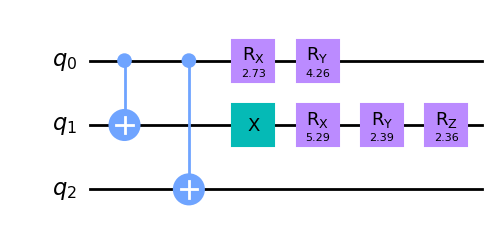

In [2]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute


alpha = np.random.rand() + 1j * np.random.rand()
beta = np.sqrt(1 - np.abs(alpha)**2) * np.exp(1j * np.random.rand() * 2 * np.pi)


angle_x = np.random.rand() * 2 * np.pi
angle_y = np.random.rand() * 2 * np.pi
angle_z = np.random.rand() * 2 * np.pi

qc = QuantumCircuit(3)

qc.cx(0, 1)
qc.cx(0, 2)


qc.rx(2 * np.angle(alpha), 0)  
qc.ry(2 * np.angle(beta), 0)   

error_qubit = 1
qc.x(error_qubit)
qc.rx(angle_x, 1)
qc.ry(angle_y, 1)
qc.rz(angle_z, 1)
qc.draw()




In [3]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector(qc)
print("Generated alpha:", alpha)
print("Generated beta:", beta)
print("Generated angle_x:", angle_x)
print("Generated angle_y:", angle_y)
print("Generated angle_z:", angle_z)
print("Error qubit:", error_qubit)
print("Statevector:", statevector)

Generated alpha: (0.07986842637048763+0.3839786250099445j)
Generated beta: (-0.4887006990096257+0.7793286064248365j)
Generated angle_x: 5.288302811119175
Generated angle_y: 2.392575111130507
Generated angle_z: 2.3594606294875886
Error qubit: 1
Statevector: Statevector([0.66610734+0.21373773j, 0.45384887-0.06371864j,
             0.35577008+0.28938075j, 0.29233131+0.06933373j,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ],
            dims=(2, 2, 2))


# Mesuring Error

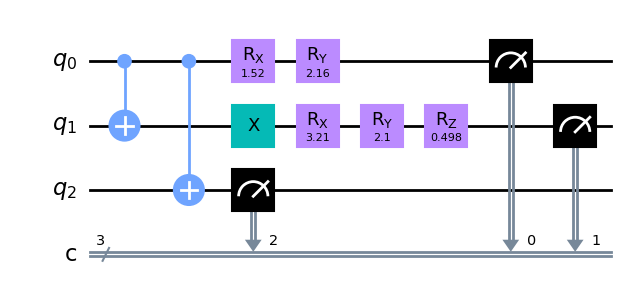

In [26]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute


alpha = np.random.rand() + 1j * np.random.rand()
beta = np.sqrt(1 - np.abs(alpha)**2) * np.exp(1j * np.random.rand() * 2 * np.pi)


angle_x = np.random.rand() * 2 * np.pi
angle_y = np.random.rand() * 2 * np.pi
angle_z = np.random.rand() * 2 * np.pi

qc = QuantumCircuit(3,3)

qc.cx(0, 1)
qc.cx(0, 2)


qc.rx(2 * np.angle(alpha), 0)  
qc.ry(2 * np.angle(beta), 0)   

error_qubit = 1
qc.x(error_qubit)
qc.rx(angle_x, 1)
qc.ry(angle_y, 1)
qc.rz(angle_z, 1)

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw()

Error Syndrome Counts: {'010': 1}


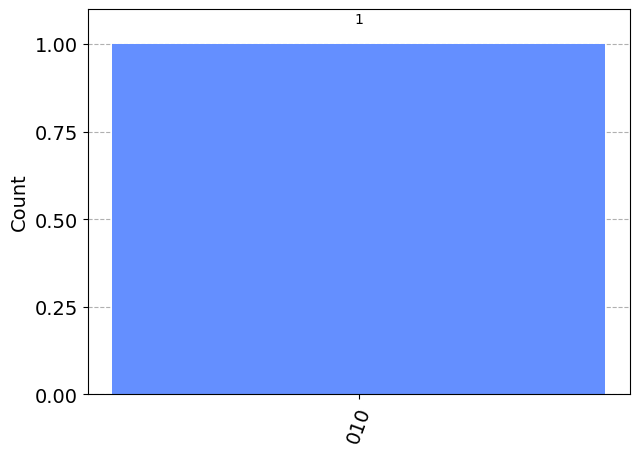

In [29]:
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1)
result = job.result()
syndrome_counts = result.get_counts(qc)
print("Error Syndrome Counts:", syndrome_counts)
plot_histogram(syndrome_counts)

# Correction

Counts: {'100': 54, '011': 51, '000': 395, '010': 524}


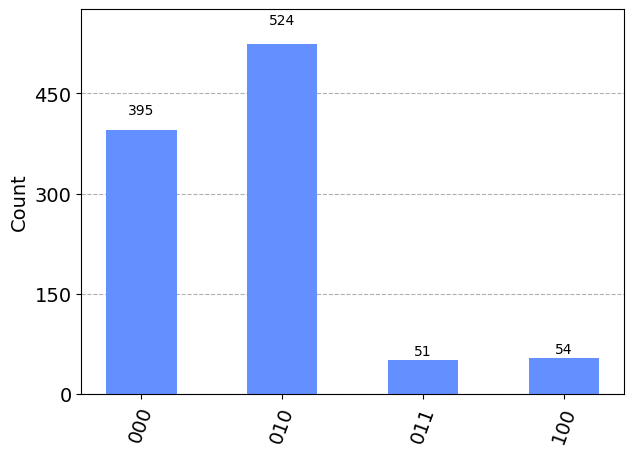

In [43]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit import ClassicalRegister


alpha = np.random.rand() + 1j * np.random.rand()
beta = np.sqrt(1 - np.abs(alpha)**2) * np.exp(1j * np.random.rand() * 2 * np.pi)


angle_x = np.random.rand() * 2 * np.pi
angle_y = np.random.rand() * 2 * np.pi
angle_z = np.random.rand() * 2 * np.pi

qc = QuantumCircuit(3,3)

qc.cx(0, 1)
qc.cx(0, 2)


qc.rx(2 * np.angle(alpha), 0)  
qc.ry(2 * np.angle(beta), 0)   

error_qubit = 1
qc.x(error_qubit)
qc.rx(angle_x, 1)
qc.ry(angle_y, 1)
qc.rz(angle_z, 1)

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.x(0).c_if(qc.cregs[0], 1)
qc.x(2).c_if(qc.cregs[0], 1)



qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
job_corrected = execute(qc, simulator, shots=1024)
result_corrected = job_corrected.result()
counts_corrected = result_corrected.get_counts(qc)
print("Counts:", counts_corrected)

plot_histogram(counts_corrected)